In [1]:
library(rtweet)
library(tidyverse)

Warning message:
"package 'rtweet' was built under R version 3.4.3"Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
packageVersion("rtweet")

[1] '0.6.0'

In [4]:
## search for users
foxnews <- search_users("fox news", n = 1, verbose = FALSE)
msnbc <- search_users("msnbc", n = 1, verbose = FALSE)
cnn <- search_users("cnn", n = 1, verbose = FALSE)

In [5]:
head(cnn, 2)

user_id,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
759251,CNN,CNN,,It’s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK & Download our app <f0><U+009F><U+0093><U+00B2>https://t.co/Xgo5kjIt8c,http://t.co/IaghNW8Xm2,FALSE,39398381,1116,132173,169407,1468,2007-02-09 00:35:02,TRUE,http://t.co/IaghNW8Xm2,http://www.cnn.com,en,https://pbs.twimg.com/profile_banners/759251/1508752874,http://pbs.twimg.com/profile_background_images/515228058286952449/zVfUxqPl.jpeg,http://pbs.twimg.com/profile_images/508960761826131968/LnvhR8ED_normal.png


In [8]:
head(msnbc)

user_id,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
2836421,MSNBC,MSNBC,,"The place for in-depth analysis, political commentary and informed perspectives. Questions? Tweet to @Farrashley. Find us on Snapchat: msnbc",https://t.co/5TAF6ijWwt,FALSE,2003758,561,20520,126513,635,2007-03-29 13:15:41,TRUE,https://t.co/5TAF6ijWwt,http://msnbc.com,en,https://pbs.twimg.com/profile_banners/2836421/1498784746,http://pbs.twimg.com/profile_background_images/644272209536552961/OQBR8Ra8.jpg,http://pbs.twimg.com/profile_images/814858612640202754/KCQAV5nf_normal.jpg


In [9]:
head(foxnews)

user_id,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
1367531,Fox News,FoxNews,U.S.A.,"America’s Strongest Primetime Lineup Anywhere! Follow America's #1 cable news network, delivering you breaking news, insightful analysis, and must-see videos.",http://t.co/ZYG58XZtAC,FALSE,17170572,405,62242,360764,0,2007-03-17 19:01:26,TRUE,http://t.co/ZYG58XZtAC,http://www.foxnews.com,en,https://pbs.twimg.com/profile_banners/1367531/1492649996,http://pbs.twimg.com/profile_background_images/414488415/xyz123abc.jpg,http://pbs.twimg.com/profile_images/918480715158716419/4X8oCbge_normal.jpg


In [10]:
## get followers
dem <- get_followers("msnbc", n = 1000)

In [11]:
head(dem)

user_id
961038294921330689
264713789
957809824921657344
273919025
959785976997478406
1512048486


In [12]:
## get followers
gop <- get_followers("FoxNews", n = 1000)

In [13]:
head(gop)

user_id
962803507228303371
961961320701624321
962802558501662721
962801205088079872
962803331180703750
962803352684855297


In [14]:
## get followers
mod <- get_followers("cnn", n = 1000)

In [15]:
head(mod)

user_id
962803507228303371
962802364691439616
962803511036653568
957507103815421952
962802517800255488
962803331180703750


In [16]:
## get gop users data
gop_data <- lookup_users(gop$user_id)

In [17]:
## get dem users data
dem_data <- lookup_users(dem$user_id)

In [18]:
## get mod users data
mod_data <- lookup_users(mod$user_id)

In [19]:
## create "partisan" grouping variable
gop_data$partisan <- "gop"
dem_data$partisan <- "dem"
mod_data$partisan <- "mod"

## merge into single data frame
data <- bind_rows(gop_data, dem_data, mod_data)

In [20]:
## PRINT: group by partisan and summarise friends and followers counts
data %>%
    group_by(partisan) %>%
    summarise(
        friends = mean(friends_count, na.rm = TRUE),
        followers = mean(followers_count, na.rm = TRUE))

partisan,friends,followers
dem,442.471,196.095
gop,152.495,494.326
mod,182.166,104.920


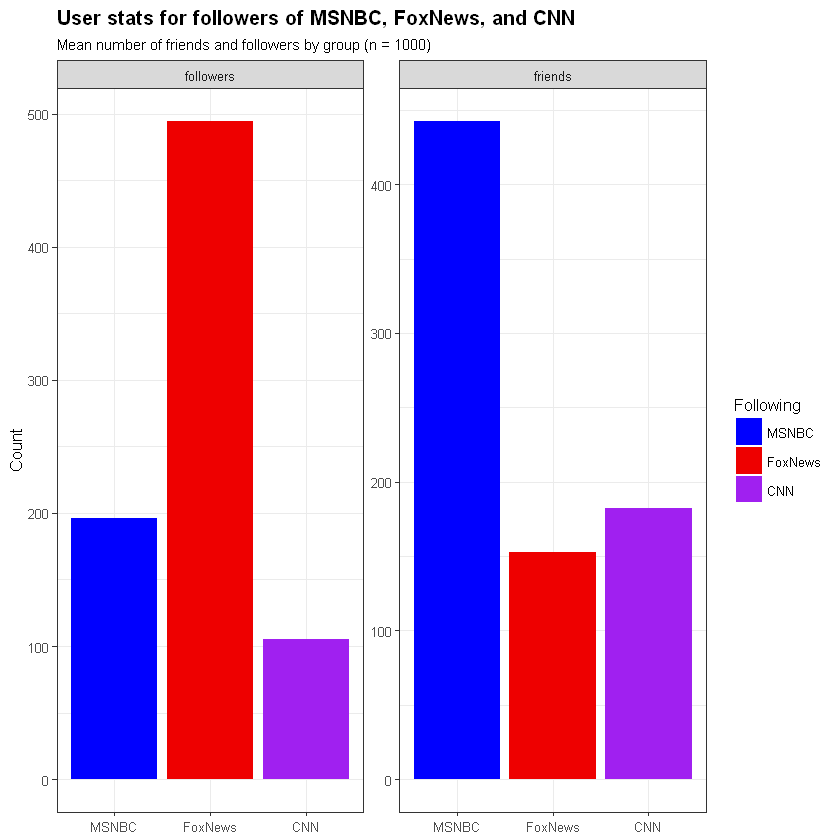

In [21]:
## PLOT: group by partisan and summarise integer vars
data %>%
    mutate(Following = factor(partisan, labels = c("MSNBC", "FoxNews", "CNN"))) %>%
    group_by(Following) %>%
    summarise(
        friends = mean(friends_count, na.rm = TRUE),
        followers = mean(followers_count, na.rm = TRUE)) %>%
    gather(var, count, -Following) %>%
    ggplot(aes(x = Following, y = count, fill = Following)) + 
    geom_col() + 
    facet_wrap(~ var, ncol = 2, scales = "free_y") + 
    theme_bw(base_size = 10) + 
    theme(plot.title = element_text(face = "bold")) + 
    scale_fill_manual(values = c(FoxNews = "red2", MSNBC = "blue", CNN = "purple")) + 
    labs(
        title = "User stats for followers of MSNBC, FoxNews, and CNN",
        subtitle = "Mean number of friends and followers by group (n = 1000)", 
        x = NULL, y = "Count")

In [22]:
## function to filter and then randomly sample user IDs
rsamp_uq <- function(..., n) {
    
    dots <- list(...)
    
    groups <- names(dots)
    
    user_ids <- lapply(dots, "[[", "user_id")
    
    
    for (i in seq_along(dots)) {
        
        ## filter out users found in other groups and protected users
        dots[[i]] <- filter(
            dots[[i]], 
            !user_id %in% unlist(user_ids[-i]) & !protected
        )
        
        dots[[i]]$group <- groups[i]
    }
    
    sample_users <- function(x, n) x[x$user_id %in% sample(x$user_id, n), ]
        
    out <- lapply(dots, sample_users, n)
        
    bind_rows(out)
}
    
    

## filter and sample 5 from each group
smps <- rsamp_uq(gop = gop_data, dem = dem_data, mod = mod_data, n = 5)

In [23]:
## get friends for each sampled user
fds <- lapply(smps$user_id, get_friends, verbose = FALSE)

Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"Warning message:
"Rate limit exceeded"

In [24]:
## add the list of data frames to smps as a list column
smps$fds <- I(fds)

In [25]:
## create function to identify the top 3 accounts and then lookup their screen names

get_top_names <- function(x, n = 3) {
    
    tbl <- sort(table(unlist(x)), decreasing = TRUE)
    
    if (length(tbl) > n) {
        tbl <- tbl[seq_len(n)]
    }
    
    sns <- lookup_users(names(tbl))
    
    sns$screen_name
}

In [26]:
## print out top 3 screen names associated with each group
smps %>% 
    group_by(group) %>%
    summarise(
        freq = list(get_top_names(fds))
    )

ERROR: Error in summarise_impl(.data, dots): Evaluation error: argument is of length zero.
